## Script to parse the images to get the results into the dictionary

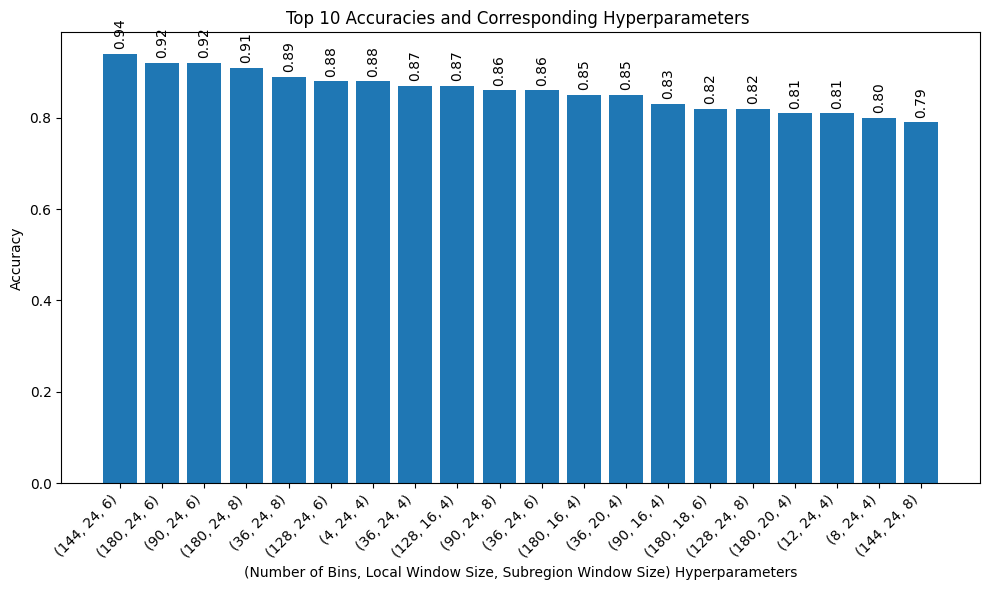

In [23]:
import matplotlib.pyplot as plt
import os
import re

# Set the working directory as the current directory for paths to work
directory = "outputImages/EvalImages/"

files = os.listdir(directory)

filtered_results = {}
# Iterate over each file
for file in files:
    file_name = os.path.splitext(file)[0]  # Get the file name without the extension
    if (file_name.startswith("eval_")):
        pattern = r'eval_bin(\d+)main(\d+)small(\d+)accuracy([\d.]+)'
        # Use re.match to find the pattern in the string
        match = re.match(pattern, file_name)
        # Extract the values
        if match:
            bin_val = int(match.group(1))
            main_win_val = int(match.group(2))
            small_win_val = int(match.group(3))
            accuracy_val = float(match.group(4))
            if bin_val not in filtered_results:
                filtered_results[bin_val] = {}
            if main_win_val not in filtered_results[bin_val]:
                filtered_results[bin_val][main_win_val] = {}
            filtered_results[bin_val][main_win_val][small_win_val] = accuracy_val

# Extract hyperparameters and accuracy values
bins = []
main_windows = []
small_windows = []
accuracies = []

for bin_val, main_dict in filtered_results.items():
    for main_win, small_dict in main_dict.items():
        for small_win, accuracy in small_dict.items():
            # if (accuracy > 0.75):
                bins.append(bin_val)
                main_windows.append(main_win)
                small_windows.append(small_win)
                accuracies.append(accuracy)

# Zip hyperparameters and accuracies together
hyperparameters_accuracies = list(zip(bins, main_windows, small_windows, accuracies))

# Sort by accuracy in descending order
hyperparameters_accuracies.sort(key=lambda x: x[3], reverse=True)
hyperparameters_accuracies = hyperparameters_accuracies[0:20]
# Unzip sorted hyperparameters and accuracies
bins_sorted, main_windows_sorted, small_windows_sorted, accuracies_sorted = zip(*hyperparameters_accuracies)

# Create bar chart with sorted data
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(accuracies_sorted)), accuracies_sorted, tick_label=[f"({b}, {m}, {s})" for b, m, s in zip(bins_sorted, main_windows_sorted, small_windows_sorted)])
ax.set_xlabel('(Number of Bins, Local Window Size, Subregion Window Size) Hyperparameters')
ax.set_ylabel('Accuracy')
ax.set_title('Top 10 Accuracies and Corresponding Hyperparameters ')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies_sorted):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.show()



In [8]:
# Extract top 20 accuracy values along with their corresponding main window and smaller window sizes
top_20_hyperparameters_accuracies = sorted(hyperparameters_accuracies, key=lambda x: x[3], reverse=True)[:20]

# Count occurrences of each unique pair of main window and smaller window sizes
window_size_counts = {}
for bin_val, main_win, small_win, accuracy in top_20_hyperparameters_accuracies:
    pair = (main_win, small_win)
    if pair in window_size_counts:
        window_size_counts[pair] += 1
    else:
        window_size_counts[pair] = 1

# Find the pair with the highest count
most_common_pair = max(window_size_counts, key=window_size_counts.get)
count = window_size_counts[most_common_pair]

print(f"The pair of main window and smaller window sizes with the most entries in the top 20 accuracies is: {most_common_pair} with {count} occurrences.")


The pair of main window and smaller window sizes with the most entries in the top 20 accuracies is: (24, 8) with 5 occurrences.


In [9]:
from collections import Counter

# Extract top 20 accuracy values along with their corresponding main window and smaller window sizes
top_20_hyperparameters_accuracies = sorted(hyperparameters_accuracies, key=lambda x: x[3], reverse=True)[:20]

# Count occurrences of main window sizes
main_window_counts = Counter([item[1] for item in top_20_hyperparameters_accuracies])

# Find the most common main window size
most_common_main_window = main_window_counts.most_common(1)[0][0]
most_common_main_window_count = main_window_counts.most_common(1)[0][1]

print(f"Most common main window size in the top 20 accuracies: {most_common_main_window} (Appears {most_common_main_window_count} times)")

# Count occurrences of smaller window sizes
small_window_counts = Counter([item[2] for item in top_20_hyperparameters_accuracies])

# Find the most common smaller window size
most_common_small_window = small_window_counts.most_common(1)[0][0]
most_common_small_window_count = small_window_counts.most_common(1)[0][1]

print(f"Most common smaller window size in the top 20 accuracies: {most_common_small_window} (Appears {most_common_small_window_count} times)")


Most common main window size in the top 20 accuracies: 24 (Appears 13 times)
Most common smaller window size in the top 20 accuracies: 4 (Appears 9 times)


(153,)


ValueError: 'c' argument has 153 elements, which is inconsistent with 'x' and 'y' with size 170.

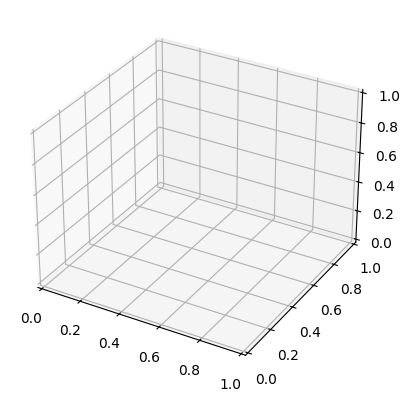

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

hyperparameters = []

# Iterate over filtered_results dictionary
for bin_val, main_dict in filtered_results.items():
    for main_win, small_dict in main_dict.items():
        for small_win, accuracy in small_dict.items():
            # Append the hyperparameter tuple to the list
            # if (bin_val < 360):
            hyperparameters.append((bin_val, main_win, small_win))


# Convert the list to a NumPy array
hyperparameters_array = np.array(hyperparameters)

accuracies_array = np.array(accuracies)
print(accuracies_array.shape)
# Create a new figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with accuracy-based colors
sc = ax.scatter(hyperparameters_array[:, 0], hyperparameters_array[:, 1], hyperparameters_array[:, 2], c=accuracies_array, cmap='viridis')

# Add labels and title
ax.set_xlabel('Bins')
ax.set_ylabel('Main Window Size')
ax.set_zlabel('Small Window Size')
ax.set_title('Hyperparameters vs. Accuracy')

# Add a color bar
cbar = plt.colorbar(sc)
cbar.set_label('Accuracy')

# Show the plot
plt.show()


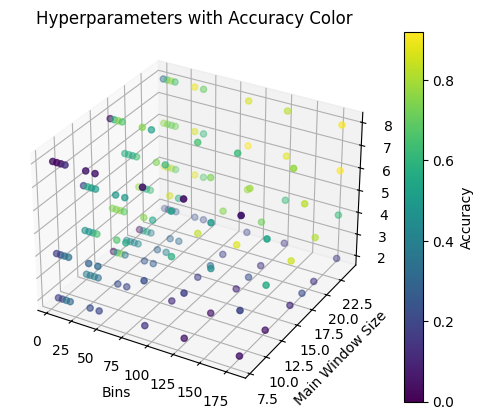

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

hyperparameters = []
accuracies = []

# Iterate over filtered_results dictionary
for bin_val, main_dict in filtered_results.items():
    for main_win, small_dict in main_dict.items():
        for small_win, accuracy in small_dict.items():
            # Append the hyperparameter tuple and accuracy to the lists
            if (bin_val < 360):
                hyperparameters.append((bin_val, main_win, small_win))
                accuracies.append(accuracy)

# Convert the lists to NumPy arrays
hyperparameters_array = np.array(hyperparameters)
accuracies_array = np.array(accuracies)

# Create a new figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with accuracy-based colors
sc = ax.scatter(hyperparameters_array[:, 0], hyperparameters_array[:, 1], hyperparameters_array[:, 2], c=accuracies_array, cmap='viridis')

# Add color bar
plt.colorbar(sc, label='Accuracy')

# Add labels and title
ax.set_xlabel('Bins')
ax.set_ylabel('Main Window Size')
ax.set_zlabel('Small Window Size')
ax.set_title('Hyperparameters with Accuracy Color')

# Show the plot
plt.show()

